In [1]:
# this notebook will house plots of pfeiffer data with 10-Be erosion constraints

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load data
# with cosmo
pfeiffer_data_Be10 = pd.read_excel('pfeiffer Be phillips overlap.xlsx')

# and without
pfeiffer_data = pd.read_excel('pfeiffer phillips overlap.xlsx')

In [5]:
pfeiffer_data

,ID,Citation,Site_Name,tau_*bf,Slope,D50 (m),Width (m),Depth (m),Discharge (m3/s),State/Province,tau_*c,tau_*bf / tau_*c,phi,density ratio,gravity,bedload xport per unit area (m^2/s),total bedload xport (m^3/s)
0,1632,"Williams, 1978","Nestucca River near Beaver, OR",0.003422,0.00021,0.04500,39.6000,1.210000,70.800000,OR,0.018057,0.189523,3.97,1.65,9.81,NaN,NaN
1,1640,"Williams, 1978","Row River above Pitcher Creek near Dorena, OR",0.004909,0.00054,0.07200,34.1000,1.080000,11.300000,OR,0.022866,0.214690,3.97,1.65,9.81,NaN,NaN
2,915,"King et al., 2004; Mueller et al., 2005",JOHNSON CREEK AT YELLOW PINE ID,0.012887,0.00400,0.19000,24.0000,1.010000,39.700000,ID,0.037723,0.341615,3.97,1.65,9.81,NaN,NaN
3,918,"King et al., 2004; Mueller et al., 2005",North Fork Clearwater River near Canyon Ranger...,0.008868,0.00050,0.09500,84.0000,2.780000,453.000000,ID,0.022430,0.395342,3.97,1.65,9.81,NaN,NaN
4,734,"Foster, 2012","Jack Creek above Coyote Draw, near Saratoga, WY",0.013022,0.00200,0.03660,26.8224,0.393192,5.720003,WY,0.031721,0.410507,3.97,1.65,9.81,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,682,"Emmett, 1972",Little Chena River at Fairbanks,0.315152,0.00200,0.01350,37.0000,3.510000,73.000000,AK,0.031721,9.935063,3.97,1.65,9.81,0.003780,0.139875
171,680,"Emmett, 1972",Hess Creek near Livengood,0.369960,0.00200,0.01150,27.0000,3.510000,141.000000,AK,0.031721,11.662900,3.97,1.65,9.81,0.003875,0.104620
172,133,"Chaplin, 2005; Krstolic and Chaplin, 2007","CHOPTANK RIVER NEAR GREENSBORO, MD",0.532151,0.00030,0.00041,29.6000,1.200000,19.500000,MD,0.019741,26.956477,3.97,1.65,9.81,0.000049,0.001440
173,1076,"McCandless and Everett, 2002; Li et al., 2015","Little Falls at Blue Mount, Md.",0.994448,0.00190,0.00174,20.7264,1.502664,47.402401,MD,0.031317,31.754306,3.97,1.65,9.81,0.001096,0.022711


In [7]:
# calculate bedload transport

# some values
rho_ratio = 1.65
g = 9.81
phi = 3.97

# calculation
# first need tau_c*
pfeiffer_data_Be10['tau_*c'] = 0.15 * pfeiffer_data_Be10['Slope']**(0.25)
pfeiffer_data_Be10['Bedload xport per unit area (m^2/s)'] = phi * (rho_ratio**(0.5)) * (g**(0.5)) * (pfeiffer_data_Be10['tau_*bf'] - pfeiffer_data_Be10['tau_*c'])**(1.5) * pfeiffer_data_Be10['D50 (m)']**(1.5)
pfeiffer_data_Be10['Total bedload xport (m^3/s)'] = pfeiffer_data_Be10['Bedload xport per unit area (m^2/s)'] * pfeiffer_data_Be10['Width (m)']
pfeiffer_data_Be10['Total erosion (m^3/yr)'] = pfeiffer_data_Be10['Erosion rate (m/yr)'] * pfeiffer_data_Be10['Drainage area (m^2)']
pfeiffer_data_Be10['Total bedload xport (m^3/yr)'] = pfeiffer_data_Be10['Total bedload xport (m^3/s)'] * 31500000
pfeiffer_data_Be10['Fraction Qb'] = pfeiffer_data_Be10['Total bedload xport (m^3/yr)'] / pfeiffer_data_Be10['Total erosion (m^3/yr)']

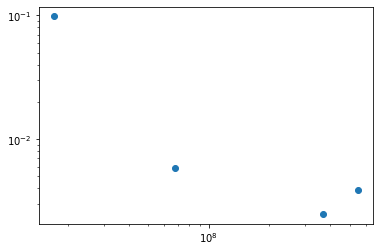

In [9]:
plt.scatter(pfeiffer_data_Be10['Drainage area (m^2)'], pfeiffer_data_Be10['Total bedload xport (m^3/s)'])
plt.xscale('log')
plt.yscale('log')

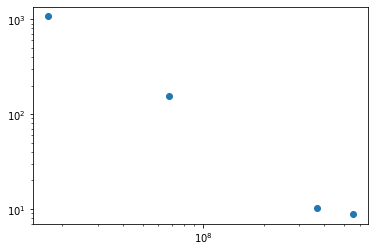

In [10]:
plt.scatter(pfeiffer_data_Be10['Drainage area (m^2)'], pfeiffer_data_Be10['Fraction Qb'])
plt.xscale('log')
plt.yscale('log')

In [11]:
# now try making similar plot to first above using no cosmo data
# first need to do some added calcs

pfeiffer_data['Bedload xport per unit area (m^2/s)'] = phi * (rho_ratio**(0.5)) * (g**(0.5)) * (pfeiffer_data['tau_*bf'] - pfeiffer_data['tau_*c'])**(1.5) * pfeiffer_data['D50 (m)']**(1.5)
pfeiffer_data['Total bedload xport (m^3/s)'] = pfeiffer_data['Bedload xport per unit area (m^2/s)'] * pfeiffer_data['Width (m)']
pfeiffer_data['Total bedload xport (m^3/yr)'] = pfeiffer_data['Total bedload xport (m^3/s)'] * 31500000

In [12]:
plt.scatter(pfeiffer_data['Drainage area (m^2)'], pfeiffer_data['Total bedload xport (m^3/s)'])
plt.xscale('log')
plt.yscale('log')

KeyError: 'Drainage area (m^2)'

In [17]:
# ah wait, try loading other pfeiffer data file
pfeiffer_data = pd.read_excel('pfeiffer 2017 data.xlsx', header = 0)

In [18]:
pfeiffer_data

,ID,Dataset,Reference,Unnamed: 3,Unnamed: 4,River/ReachName,Region,Slope,D50,Depth,width,drainage area,Lat,Long,PlateBDist,Subsurface grain size,Armor ratio,Large Wood (pieces/m2),Percent Sedimentary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m,m,m,km^2,D.dd,D.dd,m,m,NaN,pieces/m2,NaN
1,1.0,Abbe and Montgomery,1,32.0,31.0,"Tshletshy Creek,","Olympic Mountains, WA, USA",0.0112,0.063,0.91,30,74.4,47.6555,-123.8973,110000,NaN,NaN,NaN,1.0
2,2.0,Abbe and Montgomery,1,32.0,31.0,"Queets River 1,","Olympic Mountains, WA, USA",0.0050,0.022,1.42,83,224.72,47.647618,-123.9343,110000,NaN,NaN,NaN,1.0
3,3.0,Abbe and Montgomery,1,32.0,31.0,"Queets River 2,","Olympic Mountains, WA, USA",0.0059,0.047,1.29,66,178.97,47.6894,-123.849,120000,NaN,NaN,NaN,1.0
4,4.0,Abbe and Montgomery,1,32.0,31.0,"Queets River 3,","Olympic Mountains, WA, USA",0.0095,0.068,1.2,50,154.63,47.706,-123.76,120000,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,346.0,Lisle personal communication,NaN,NaN,NaN,"Nordheimer Creek, Salmon River drainage, Calif...",NaN,0.0161,0.105,0.978833,15.222,81.3,NaN,NaN,120000,NaN,NaN,NaN,1.0
338,347.0,Lisle personal communication,NaN,NaN,NaN,"Plummer Creek, Salmon River drainage, California",NaN,0.0361,0.126,0.6893,11.248,37.8,NaN,NaN,130000,NaN,NaN,NaN,1.0
339,348.0,Lisle personal communication,NaN,NaN,NaN,"Red Cedar Creek, Elk River drainage, Oregon",NaN,0.0164,0.061,0.4139,11.3335,7.02,NaN,NaN,58309.5,NaN,NaN,NaN,1.0
340,349.0,Lisle personal communication,NaN,NaN,NaN,"South Fork Caspar Creek, California",NaN,0.0115,0.047,0.4275,3.385167,5.36,NaN,NaN,10000,NaN,NaN,NaN,NaN
